In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

dataset_id = "MSV000086809" # Indicate Dataset Here
#Datasets: PXD027742, MSV000086004, MSV000086809, PXD016057MS3

filepath = dataset_id + "/psm.TSV"
info_path = dataset_id + "/sdrf.xlsx" # Decide on what file extension to use for sdrf files

psm_df = pd.read_csv(filepath, delimiter = "\t")
sdrf_df = pd.read_excel(info_path)

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.99]

psm_df["File_Name"] = psm_df["Spectrum File"].str.extract(r"^(?:.+\\)*interact-(.+)\.pep\.xml$")
sdrf_df["File_Name"] = sdrf_df["file name"].str.extract(r"^(?:.+\\)*(.+)\.raw$")

datasets = psm_df["File_Name"].unique()

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                               'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                               'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

channels = ["126","127N","127C","128N","128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N"]

psm_df = pd.melt(psm_df, id_vars=["File_Name"], value_vars=channels) # "131C","132N","132C","133N","133C","134N"])



data_dict = {}
info_dict = {}
for dataset in datasets:
    data_dict[dataset] = psm_df.loc[psm_df["File_Name"] == dataset]
    info_dict[dataset] = sdrf_df.loc[sdrf_df["File_Name"] == dataset]
    

# psm_df = psm_df.loc[(psm_df["Spectrum File"] == "D:\\Users\\PCL_user\\Mass_Spec\\data\\TMT_sc_data\\Datasets\\MSV000086004\\output\\interact-hs0105.pep.xml")]

# psm_df
print(info_dict)

# psm_df["value"] = psm_df["value"].apply(np.log10)
# psm_df["value"] = np.log10(psm_df["value"].replace(0, np.nan))



{'CellenONE_I3T_NEM_SC_Chip1_C1':                             file name condition  Plex sample name label  \
0   CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16         126   126   
1   CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16        127N  127N   
2   CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16        127C  127C   
3   CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16        128N  128N   
4   CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16        128C  128C   
5   CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16        129N  129N   
6   CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16        129C  129C   
7   CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16        130N  130N   
8   CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16        130C  130C   
9   CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16        131N  131N   
10  CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16        131C  131C   
11  CellenONE_I3T_NEM_SC_Chip1_C1.raw   N2_chip    16        132N 

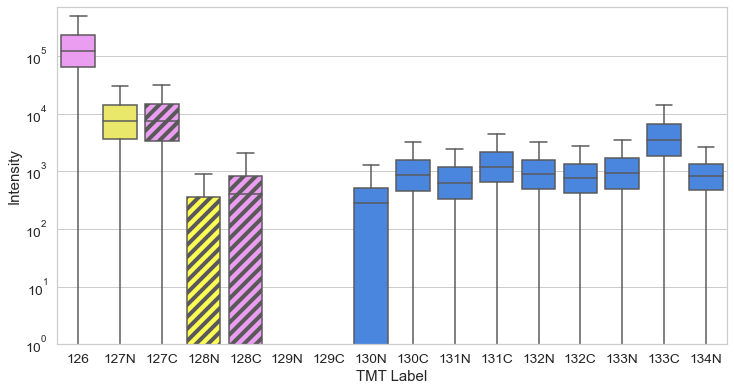

In [2]:
# color_match = {"126": "#FFBDFC", "127N": "#FFBDFC", "127C": "#FFBDFC", "128N": "#FFBDFC",  "128C": "#FFBDFC",
#                "129N": "#FFBDFC", "129C": "#FFBDFC", "130N": "#FCFF99", "130C": "#B8CDF0", "131N": "#FF8C8E",
#                "131C": "#FCFF99", "132N": "#B8CDF0", "132C": "#FF8C8E", "133N": "#FCFF99", "133C": "#B8CDF0", "134N": "#FF8C8E"}



for dataset in datasets:
    curr_df = data_dict[dataset]
    info_df = info_dict[dataset]
    
    info_df.reset_index(drop=True, inplace=True)
    
    channel_colors = {"boost": "#F78FFF", "reference": "#FFFD55", "blank": "#F78FFF", "single": "#3282F6"}
    
    # build a new color_match dictionary using the label and type columns from info_dict
        
    labels = info_df["label"]
    color_match = {}
    boost_volume = 0
    
    for channel in labels:
        row = info_df.index[info_df["label"] == channel].tolist()[0]
        channel_type = info_df["type"].iloc[row]
        if (channel_type == "boost"):
            boost_volume += info_df["cell_equivalents"].iloc[row]
        
        color_match[str(channel)] = channel_colors[channel_type]
    
    plt.figure(figsize=(12, 6.2025)) # Original: (16, 8.27)
    # sns.set_palette(sns.color_palette(colors))
    
    sns.set(font_scale=1.25)
    sns.set_style("whitegrid")

    boxplot = sns.boxplot(data=curr_df, x="variable", y="value", palette = color_match, showfliers=False, order=channels)
    
    hatches = ["","","//","//","//"]
    plt.rcParams['hatch.linewidth'] = 4
    # plt.rcParams['hatch.color'] = "#F78FFF"
    
    alternate = 0
    
    for hatch, patch in zip(hatches, boxplot.patches):
        if hatch == "//" and alternate != 1:
            patch.set_edgecolor("#595959")
            alternate += 1
        elif hatch == "//":
            patch.set_color("#FFFD55")
            patch.set_edgecolor("#595959")
            alternate += 1
            
        patch.set_hatch(hatch)
        
    # Plot a second boxplot with just outlines to cover up the pink borders on hatched patches

    # boxplot = sns.stripplot(data=curr_df, x="variable", y="value", color='0', jitter=True, alpha=0.01, 
    #                  order=["126","127N","127C","128N","128C","129N","129C","130N",
    #                         "130C","131N","131C","132N","132C","133N","133C","134N"])

    # boxplot.set_title(dataset_id + ": " + str(round(boost_volume)) + "x Carrier", fontsize=25)
    boxplot.set(xlabel="TMT Label", ylabel="Intensity")

    # plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3', 'legendEntry4', 'legendEntry5', '6', '7', '8'])
    # sns.move_legend(boxplot, "center left")

    plt.yscale('log')
    plt.gca().set_ylim(ymin=1)
    # plt.savefig(dataset_id + "/" + dataset + "_abundance_figure.png", dpi=400)
    plt.show()
    